### Question 1-1 Data Loading

In [2]:
import pandas as pd
import numpy as np

pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID",axis=1, inplace = True) #RID는 그냥 순서라서 삭제
pd_data

# Input: df(데이터), label(타겟변수명)
# 난이도를 낮추기 위해 함수 중 일부를 작성하였으나, 아예 새로 함수를 만들어도 괜찮습니다.

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [3]:
def get_gini(df, label):

    numerator = int(len(df[df[label] == 'yes']))
    denominator = int(len(df))
    gini = 1 - (numerator/denominator)**2 - (1-numerator/denominator)**2

    return gini

print(get_gini(pd_data,'class_buys_computer'))

0.4591836734693877


### Question 1-2 Feature의 Class를 이진 분류로 만들기
- ex) {A,B,C} -> ({A}, {B,C}), ({B}, {A,C}), ({C}, {A,B})
- Input: df(데이터), attribute(Gini index를 구하고자 하는 변수명)
- Income 변수를 결과로 출력해주세요.

In [4]:
from itertools import combinations

import pandas as pd
import numpy as np
import math as math

pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID",axis=1, inplace = True) #RID는 그냥 순서라서 삭제

def get_binary_split(df, attribute):
    
    #결과 담을 list 선언
    result = []
    uniq =  list(df[attribute].unique())
    for i in range(1, len(uniq)):
        result += [list(x) for x in combinations(uniq, i)]

    return result

In [5]:
get_binary_split(pd_data,"income")

[['high'],
 ['medium'],
 ['low'],
 ['high', 'medium'],
 ['high', 'low'],
 ['medium', 'low']]

### Question 1-2 모든 이진분류의 경우의 Gini index를 구하는 함수 만들기
- 위에서 완성한 두 함수를 사용하여 만들어주세요!
- 해당 결과는 아래와 같이 나와야 합니다.

In [7]:
def get_attribute_gini_index(df, attribute, label):
    
    #전체 데이터 개수 세기
    n = len(df)
    
    #Feature의 Class를 이진 분류로 만들기
    splits = get_binary_split(df, attribute)
    
    #결과 담을 dictionary 선언
    result = {}
    
    
    for split in splits:
        in_split = df[df[attribute].isin(split)]
        out_split = df[~df[attribute].isin(split)]
        gini = ((len(in_split) / n) * get_gini(in_split, label) + (len(out_split) / n) * get_gini(out_split, label))  # gini 값 계산
        result['_'.join(split)] = gini
    return result

In [8]:
get_attribute_gini_index(pd_data, "income", "class_buys_computer")

{'high': 0.44285714285714284,
 'medium': 0.4583333333333333,
 'low': 0.45,
 'high_medium': 0.45,
 'high_low': 0.4583333333333333,
 'medium_low': 0.44285714285714284}

- 여기서 가장 작은 Gini index값을 가지는 class를 보여주세요.

In [9]:
min(get_attribute_gini_index(pd_data, "income", "class_buys_computer").items())

('high', 0.44285714285714284)

### Question 1-3 분류를 하는 데 가장 중요한 변수를 선정하고, 해당 변수의 Gini index를 제시해주세요.
- 모든 변수에 대한 Gini index(최소)를 출력해주세요.
- 해당 결과는 아래와 같이 나와야 합니다.

In [10]:
# 변수명 중 마지막에 위치한 label 컬럼 얻기
label = pd_data.columns[-1]
# label 변수를 제외한 변수명 얻기
features = list(pd_data.columns[:-1])

# 각 변수를 대상으로 반복문 수행(해당 변수 중 가장 낮은 gini 계수와 변수 출력)
for col in features:
    min_gini = min(get_attribute_gini_index(pd_data, col, "class_buys_computer").items())[1]
    print(f"Minimum Gini index of {col} : {min_gini:.4f}")

Minimum Gini index of age : 0.3571
Minimum Gini index of income : 0.4429
Minimum Gini index of student : 0.3673
Minimum Gini index of credit_rating : 0.4286


age의 Gini index가 0.3571로 가장 낮으므로, 분류를 하는 데 가장 중요한 변수는 age이다.

## 위에서 선정한 feature로 DataFrame을 split한 후 나눠진 2개의 DataFrame에서 각각 다음으로 중요한 변수를 선정하고 해당 변수의 Gini index를 제시해주세요.

In [11]:
age_split = get_attribute_gini_index(pd_data, "age", label)
age_split

{'youth': 0.3936507936507937,
 'middle_aged': 0.35714285714285715,
 'senior': 0.45714285714285713,
 'youth_middle_aged': 0.45714285714285713,
 'youth_senior': 0.35714285714285715,
 'middle_aged_senior': 0.3936507936507937}

youth, senior / middle_aged로 나누는 것이 가장 좋은 것으로 나타난다.

In [12]:
features.remove('age')

In [13]:
middle_aged = pd_data[pd_data["age"].isin(['youth', 'senior'])]
not_middle_aged = pd_data[~pd_data["age"].isin(['youth', 'senior'])]

In [14]:
# 각 변수를 대상으로 반복문 수행

for col in features:
    min_gini = min(get_attribute_gini_index(middle_aged, col, "class_buys_computer").items())[1]
    print(f"Minimum Gini index of {col}(Middle aged) : {min_gini:.4f}")

print("#############################################################")

for col in features:
    min_gini = min(get_attribute_gini_index(not_middle_aged, col, "class_buys_computer").items())[1]
    print(f"Minimum Gini index of {col}(Middle aged) : {min_gini:.4f}")

Minimum Gini index of income(Middle aged) : 0.3750
Minimum Gini index of student(Middle aged) : 0.3200
Minimum Gini index of credit_rating(Middle aged) : 0.4167
#############################################################
Minimum Gini index of income(Middle aged) : 0.0000
Minimum Gini index of student(Middle aged) : 0.0000
Minimum Gini index of credit_rating(Middle aged) : 0.0000


## Entropy 를 구하는 함수 만들기

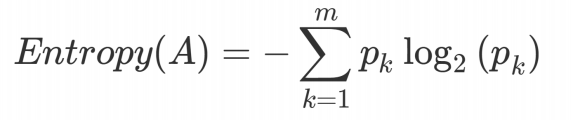

In [15]:
def getEntropy(df, feature):
    
    entropy = 0 
    ps = df[feature].value_counts() / len(df)
    for p in ps:
        entropy -= p * np.log2(p)
        
    return entropy

In [16]:
getEntropy(pd_data, "class_buys_computer")

0.9402859586706311

In [17]:
def getGainA(df, features) :
    info_D = getEntropy(df, features) # 목표변수에 대한 Entropy 를 구하기
    columns = list(df.loc[:, df.columns != features]) # 목표변수(feature)를 제외한 나머지 변수들의 변수명을 리스트 형태로 저장
    result = {}
    
    for feature in columns:
        
        entropy = 0 #entropy값 초기화
        n = len(pd_data)
        unique = df[feature].unique()
        
        for i in unique:
            tmp_df = df[df[feature].isin([i])] 
            entropy += len(tmp_df) / n * getEntropy(tmp_df, features)
            
        result[feature] = info_D - entropy
    
    return(result)

In [18]:
getGainA(pd_data, "class_buys_computer")

{'age': 0.24674981977443933,
 'income': 0.02922256565895487,
 'student': 0.15183550136234159,
 'credit_rating': 0.04812703040826949}

## Q2

/Users/seoyoungsuk/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<Axes: >

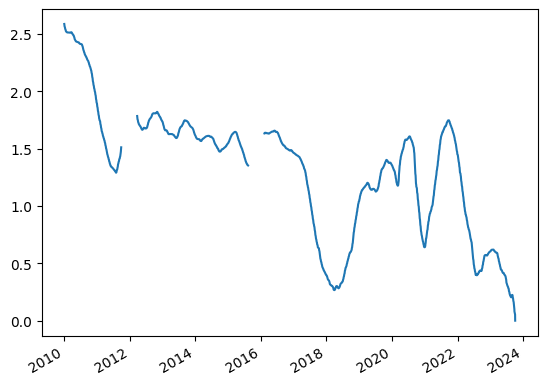

In [19]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

# 코스피 데이터 불러오기
kospi = fdr.DataReader('KS11')

# 코스피 종가 컬럼
ks_close = kospi['Close']

def Distance(Series: pd.Series) -> pd.Series:
    # (2010 ~)
    Series = Series['2009-07-15':]

    # 시점별 직전 120일 시계열 수치를 데이터프레임으로 표현
    time_dict = {}
    for i in range(120, len(Series)):
        time_dict[Series.index[i-1]] = np.array(Series)[i-120:i]
    data = pd.DataFrame(time_dict).T

    # var: 변수 X의 전기간 분산
    var = Series.var()
    
    # Distance, (2010 ~)
    distance_dict = {}
    for i in range(len(data)):
        distance_dict[data.index[i]] = (sum((data.iloc[-1] - data.iloc[i])**2 / var) / 120)**(1/2)
    distance = pd.Series(distance_dict)

    return distance

distance = Distance(kospi['Close'])
distance.plot()

## Q3

FIND-A에 오신 여러분들 환영합니다. 

이번 문제에서는 for문과 함수를 활용하여 **주식을 사고 팔아서 최대의 이익을 내는 방법**을 찾아보고자 합니다. 

Week1 퀴즈에서는 유사한 문제가 출제되었으나, Week1 퀴즈에 **수수료, 주식을 판 후에 다시 살 수 있는 요소**까지 추가로 고려하여 문제를 풀어보도록 합시다.

아래의 방법이 아니더라도 다른 정답이 있을 수 있으니 다른 방법으로 푸셔도 됩니다!

In [20]:
def maxProfit():
    cash, hold = 0, -prices[0]
    for i in range(1, len(prices)):
        cash = max(cash, hold+prices[i]-fee)
        hold = max(hold, cash-prices[i])
    return cash

In [ ]:
	#Question 2
import FinanceDataReader as fdr
import numpy as np
import pandas as pd

# 코스피 데이터 불러오기
kospi = fdr.DataReader('KS11')

# 코스피 종가 컬럼
ks_close = kospi['Close']

# 시점별 직전 120일 시계열 수치를 데이터프레임으로 표현
time_dict = {}
for i in range(120, len(ks_close)):
    time_dict[ks_close.index[i-1]] = np.array(ks_close)[i-120:i]
data = pd.DataFrame(time_dict).T

def Distance(Series: pd.Series) -> pd.Series:
    # (2010 ~)
    Series = Series['2009-07-15':]

    # 시점별 직전 120일 시계열 수치를 데이터프레임으로 표현
    time_dict = {}                     #time_dict(딕셔너리 자료형)에 for 반복문으로 내용 채워주는것
    for i in range(120, len(Series)):
        time_dict[Series.index[i-1]] = np.array(Series)[i-120:i]
    data = pd.DataFrame(time_dict).T

    # var: 변수 X의 전기간 분산
    var = Series.var()

    # Distance, (2010 ~)
    dict = {}
    for i in range(len(data)):
        dict[data.index[i]] = (sum((data.iloc[i] - data.iloc[len(data)-1])**2/var/120))**1/2
    distance = pd.DataFrame(dict, index='distance').T

    return distance

distance = Distance(kospi['Close'])
distance